In [31]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer
!pip install pylatexenc

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke, FakeKyiv
from qiskit_ibm_runtime import SamplerV2 as Sampler
backend = FakeSherbrooke()
from qiskit.quantum_info import SparsePauliOp, Statevector, Operator
from numpy import pi, random
import numpy as np
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import transpile

Based on section Superdense coding: https://learning.quantum.ibm.com/course/basics-of-quantum-information/entanglement-in-action

## For 4 bits

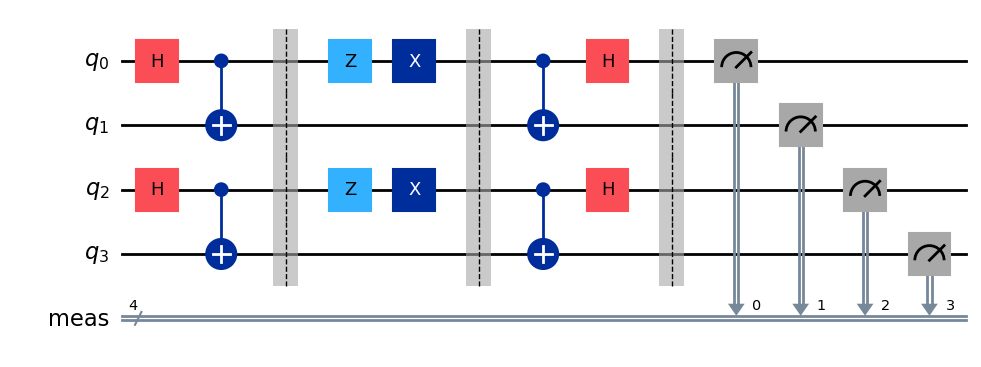

In [ ]:
def generate_dense_code_circuit(a="0", b="0", c="0", d="0"):

  qc = QuantumCircuit(4)

  qc.h(0)
  qc.cx(0, 1)

  qc.h(2)
  qc.cx(2, 3)

  qc.barrier()
  if d == "1":
    qc.z(0)
  if c == "1":
    qc.x(0)
  if b == "1":
    qc.z(2)
  if a == "1":
    qc.x(2)
  qc.barrier()

  qc.cx(0, 1)
  qc.h(0)

  qc.cx(2, 3)
  qc.h(2)

  qc.measure_all()

  return qc

qc = generate_dense_code_circuit("1", "1", "1", "1")
display(qc.draw(output="mpl"))

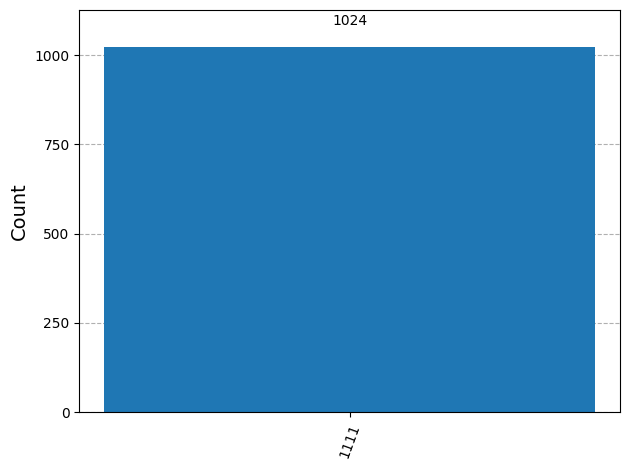

In [ ]:
def generate_results_ideal(qc):

  result = AerSimulator().run(qc).result()
  result = result.get_counts()

  return result

qc = generate_dense_code_circuit("1", "1", "1", "1")
result = generate_results_ideal(qc)
display(plot_histogram(result))

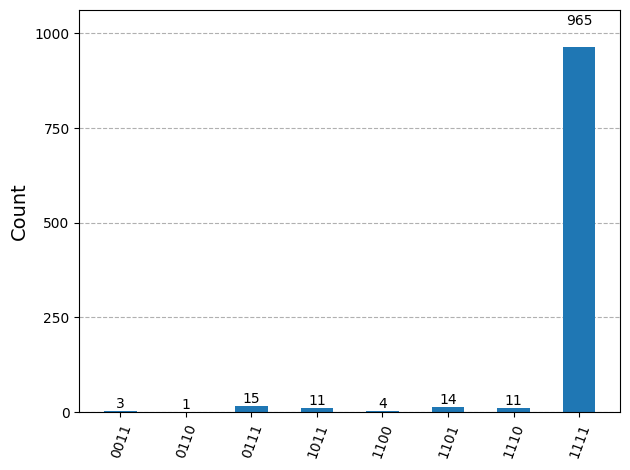

In [ ]:
def generate_results_real(qc):
  backend = FakeKyiv()
  transpiled_circuit = transpile(qc, backend)

  sampler = Sampler(backend)
  job = sampler.run([transpiled_circuit], shots=1024)

  counts = job.result()[0].data.meas.get_counts()

  return counts

qc = generate_dense_code_circuit("1", "1", "1", "1")
counts = generate_results_real(qc)
display(plot_histogram(counts))

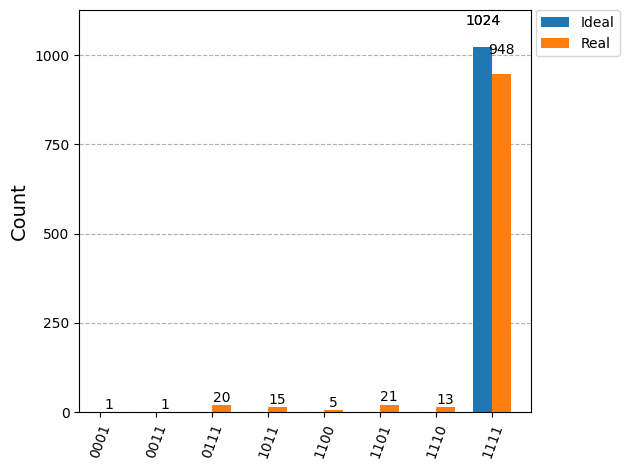

In [ ]:
qc = generate_dense_code_circuit("1", "1", "1", "1")
result_ideal = generate_results_ideal(qc)
result_real = generate_results_real(qc)
display(plot_histogram([result_ideal, result_real], legend=["Ideal", "Real"]))

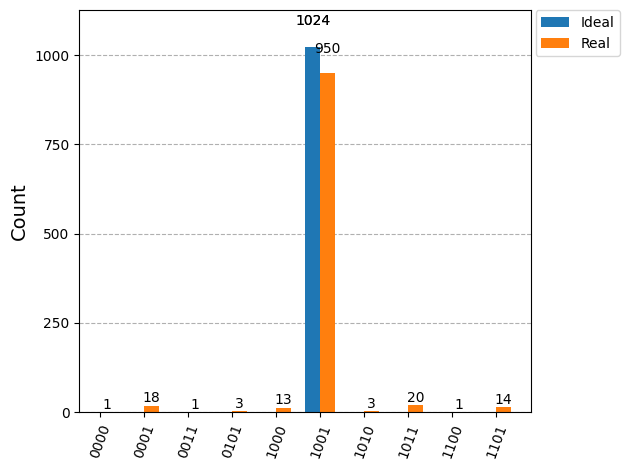

In [ ]:
qc = generate_dense_code_circuit("1", "0", "0", "1")
result_ideal = generate_results_ideal(qc)
result_real = generate_results_real(qc)
display(plot_histogram([result_ideal, result_real], legend=["Ideal", "Real"]))

## For 2*n bits

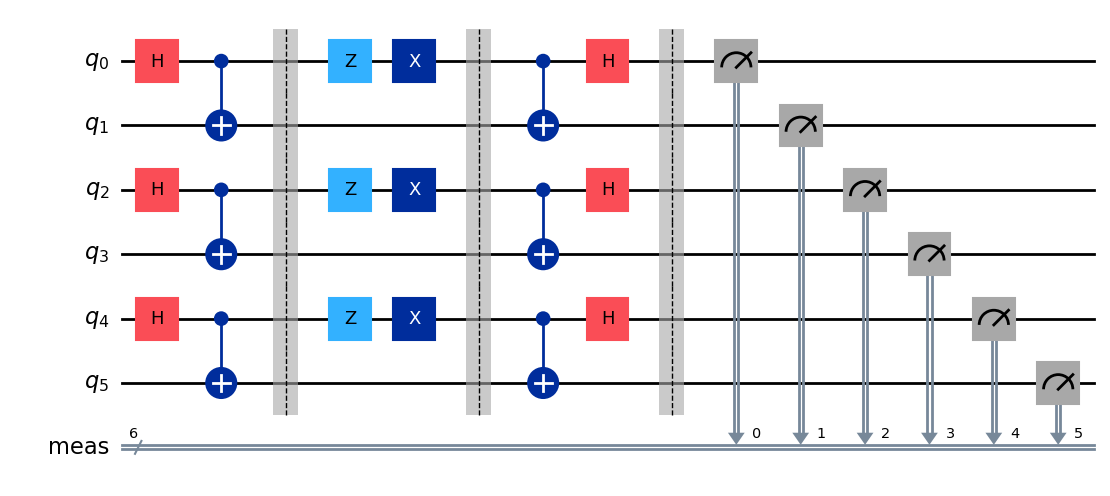

In [ ]:
def generate_dense_code_circuit(bits="0000"):
  n = len(bits)
  qc = QuantumCircuit(n)

  for i in range(0, n, 2):
    qc.h(i)
    qc.cx(i, i+1)
  qc.barrier()

  for i in range(0, n, 2):
    if bits[i] == "1":
      qc.z(i)
    if bits[i+1] == "1":
      qc.x(i)
  qc.barrier()

  for i in range(0, n, 2):
    qc.cx(i, i+1)
    qc.h(i)

  qc.measure_all()

  return qc

qc = generate_dense_code_circuit("111111")
display(qc.draw(output="mpl"))

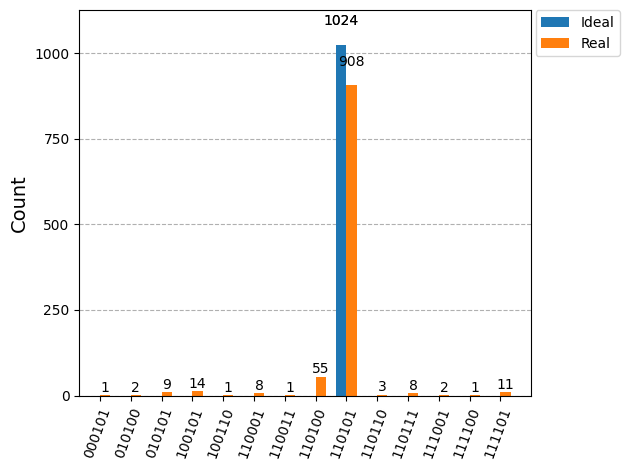

In [ ]:
qc = generate_dense_code_circuit("101011")
result_ideal = generate_results_ideal(qc)
result_real = generate_results_real(qc)
display(plot_histogram([result_ideal, result_real], legend=["Ideal", "Real"]))

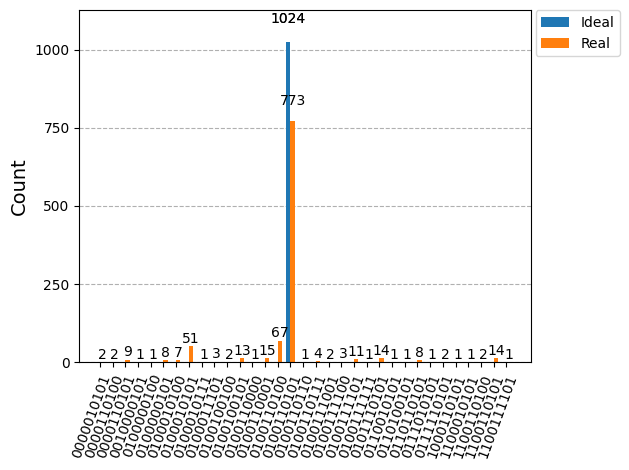

In [ ]:
qc = generate_dense_code_circuit("1010110010")
result_ideal = generate_results_ideal(qc)
result_real = generate_results_real(qc)
display(plot_histogram([result_ideal, result_real], legend=["Ideal", "Real"]))